In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from ipywidgets import interact

In [3]:

def read_data(path='data/last_data.data'):

    with open(path, 'rb') as file:
        temp = pickle.load(file)

    return temp

def load_btn_callback2(fname):
    d_list, _, _, _ = read_data('data/'+fname)

    return d_list

class PotentialShape():
    def __init__(self, L, W, V, cw=40):
        self.v_value = V
        self.L =L
        self.W = W
        self.center_x = int(self.L/2)
        self.center_y = int(self.W/2)
        self.width = 5
        self.a = 5
        self.canal_width = cw

    def single_barrier(self):
        Vtab = np.zeros((self.L, self.W))

        for i in range(self.center_x - self.width, self.center_x + self.width + 1):
            for j in range(self.W):
                Vtab[i,j] = self.v_value

        return Vtab

    def single_slit(self):
        Vtab = self.single_barrier()

        for i in range(self.center_x - self.width, self.center_x + self.width + 1):
            for j in range(int(self.W/2) - self.a, int(self.W/2) + self.a + 1):
                Vtab[i,j] = 0

        return Vtab
    def double_slit_wide(self):
        Vtab = self.single_barrier()

        for i in range(self.center_x - self.width, self.center_x + self.width + 1):
            for j in range(int(self.W/2) - 2*self.a - 8, int(self.W/2) + 2*self.a + 8 + 1):
                if j < int(self.W/2) - self.a or j > int(self.W/2) + self.a:
                    Vtab[i,j] = 0

        return Vtab

    def double_slit_close(self):
        Vtab = self.single_barrier()

        for i in range(self.center_x - self.width, self.center_x + self.width + 1):
            for j in range(int(self.W/2) - 2*self.a - 2, int(self.W/2) + 2*self.a + 2 + 1):
                if j < int(self.W/2) - 2 or j > int(self.W/2) + 2:
                    Vtab[i,j] = 0

        return Vtab

    def corner(self):
        Vtab = self.single_barrier()
        for i in range(self.center_x - self.width, self.center_x + self.width + 1):
            for j in range(0, int(self.W/2) + 1):
                if j < int(self.W/2) - 2 or j > int(self.W/2) + 2:
                    Vtab[i,j] = 0
        return Vtab

    def two_terminal_ring(self):
        Vtab = np.ones((self.L, self.W))
        Vtab = self.v_value * Vtab

        self.o_radius = 120
        self.i_radius = 80
        self.width = self.canal_width

        for i in range(self.center_x - self.o_radius, self.center_x + self.o_radius + 1):
            for j in range(self.center_y - self.o_radius, self.center_y + self.o_radius):
                if np.sqrt((i-self.center_x)**2 + (j-self.center_y)**2) > self.i_radius and np.sqrt((i-self.center_x)**2 + (j-self.center_y)**2) < self.o_radius:
                    Vtab[i, j] = 0

        for i in range(0, self.L):
            for j in range(self.center_y - int(self.width/2), self.center_y + int(self.width/2)):
                if i < self.center_x - self.i_radius or i > self.center_x + self.i_radius:
                    Vtab[i,j] = 0

        return Vtab
    
    def canal(self):

        Vtab = np.ones((self.L, self.W))
        Vtab = self.v_value * Vtab

        width = self.canal_width

        for i in range(0, self.L):
            for j in range(self.center_y - int(width/2), self.center_y + int(width/2)):
                    Vtab[i,j] = 0

        return Vtab

In [4]:
plt.rcParams["figure.figsize"] = (30,10)
data_list = load_btn_callback2("2terminal_0.0005789473684210527b.data")

L = 2240
W = 240
T_gate = 1250
R_gate = 800
#Vtab = PotentialShape(400, 400, 8*0.5).double_slit_wide()
Vtab = []
x_list = np.linspace(0, L, L)
y_list = np.linspace(0, W, W)

X, Y = np.meshgrid(x_list,y_list)

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
       return v
    return v / norm

def norm(index=0):
    suma = data_list[index].copy()
    suma = (np.abs(suma)**2)
    suma = np.sum(suma)

    return suma

def plot_function(index = 0):


    Z = np.resize(data_list[index], (L,W))
    Z = Z.transpose()
    Z = np.abs(Z*Z.conj())
    #Z = normalize(Z)
    #Vt = normalize(Vtab)

    #Z2 = Z + 4*Vt.transpose()

    plt.style.use("seaborn-colorblind")
    plt.rcParams['font.family'] = 'sans-serif'

    plt.title("Double", fontsize=15)
    plt.xlabel("x [a]", fontweight="bold", fontsize=15)
    plt.ylabel("y [a]", fontweight="bold", fontsize=15)

    plt.grid()
    
    plt.contour(X,Y,Z, colors="black", alpha=0.3, levels=20)
    plt.imshow(Z,extent=[0,L,0,W],origin="lower", cmap ="OrRd", vmin=0, vmax=float(0.0002))
    #plt.colorbar()
    #plt.imshow(Vtab.transpose(), extent=[0,400,0,400],origin="lower", cmap="gray_r")

    plt.axvline(T_gate, ymin=0, ymax=1, c="r", label="gate")
    plt.axvline(R_gate, ymin=0, ymax=1, c="r", label="gate")
    #plt.ylim(75, 325)
    #plt.xlim(75, 325)

    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(60))

    
    #plt.savefig('visualizations/double_slit_wide.png', dpi=200, bbox_inches='tight')
    plt.show()
interact(plot_function, index=(0,len(data_list), 1))

interactive(children=(IntSlider(value=0, description='index', max=31), Output()), _dom_classes=('widget-intera…

<function __main__.plot_function(index=0)>

In [ ]:
data_list = load_btn_callback2("cyklotron_480pktdt20.data")



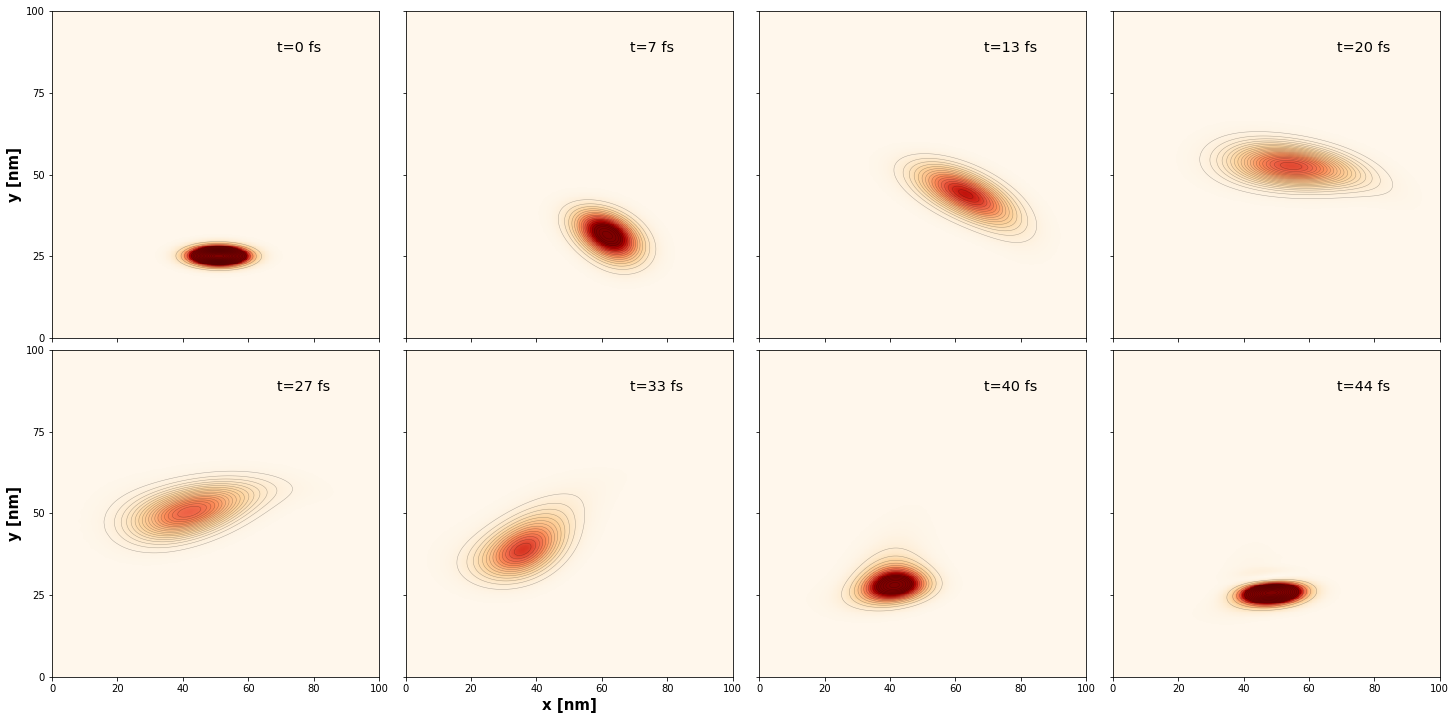

In [21]:
plt.rcParams["figure.figsize"] = (20,10)

L=400
W=400
x_list = np.linspace(0, L, L)
y_list = np.linspace(0, W, W)

X, Y = np.meshgrid(x_list,y_list)
def format_func(value, tick_number):
    return "{}".format(int(value/4))


def plot_multiple_function(index_list=[]):

    fig, axs = plt.subplots(2,4, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
    plt.tight_layout()
    plt.rcParams['font.family'] = 'sans-serif'
    plt.style.use("seaborn-colorblind")
#     plt.ylabel("y [nm]", fontweight="bold", fontsize=15)
#     plt.xlabel("x [nm]", fontweight="bold", fontsize=15)
    axs = axs.flatten()
    for i, index in enumerate(index_list):

        Z = np.resize(data_list[index], (L,W))
        Z = Z.transpose()
        Z = np.abs(Z*Z.conj())
        #Z = normalize(Z)
        #Vt = normalize(Vtab)

        #Z2 = Z + 4*Vt.transpose()

        #plt.subplot(1,4,i+1)
        #plt.title("Double", fontsize=15)


        axs[i].contour(X,Y,Z, colors="black", alpha=0.3, levels=20, linewidths=0.5)
        axs[i].imshow(Z,extent=[0,L,0,W],origin="lower", cmap ="OrRd", vmin=10**(-8), vmax=float(0.0003))
        #plt.imshow(Vtab.transpose(), extent=[0,400,0,400],origin="lower", cmap="gray_r")

        # plt.ylim(75, 325)
        # plt.xlim(75, 325)
        axs[i].text(275,350, "t="+str(round(index*20*2.2134856415181972*10**(-17)/10**(-15)))+ " fs",
                    horizontalalignment='left',
                    size='x-large',
                    weight="normal")
    

    for ax in axs:
        #ax.label_outer()
        ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        #ax.xaxis.set_minor_locator(plt.MultipleLocator(60))

    axs[5].set_xlabel("x [nm]", fontweight="bold", fontsize=15)
    axs[0].set_ylabel("y [nm]", fontweight="bold", fontsize=15)
    axs[4].set_ylabel("y [nm]", fontweight="bold", fontsize=15)
#     axs[1].set_xlabel("x [nm]", fontweight="bold", fontsize=15)
    plt.savefig('visualizations/cyklotron_scale.png', dpi=300, bbox_inches='tight')
    #plt.show()

plot_multiple_function([0,15,30,45,60,75, 90, 100])

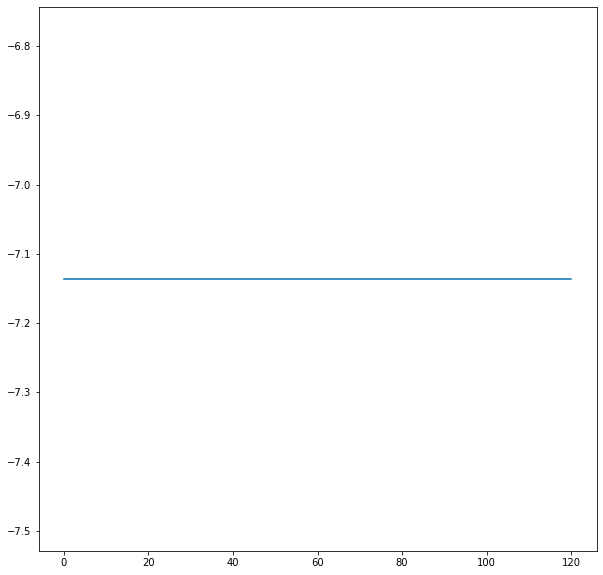

In [7]:
#norm
norm_list = [norm(index) for index in range(len(data_list))]
plt.plot(np.log(norm_list) )


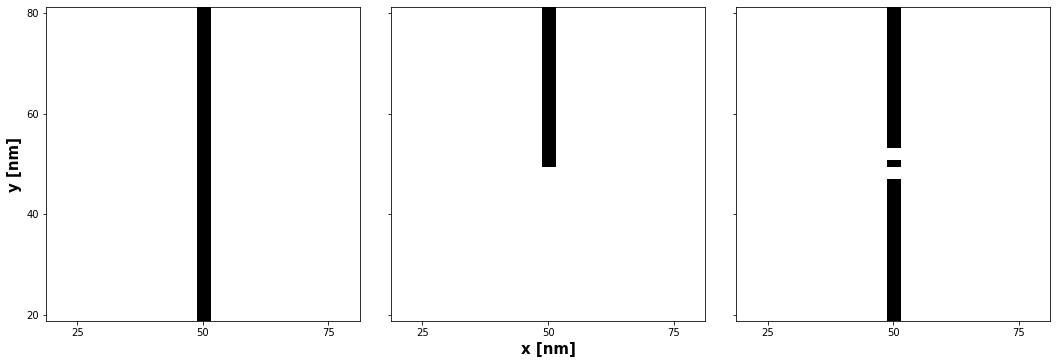

In [34]:
#potential
plt.rcParams["figure.figsize"] = (18,6)
L = 400
W = 400
Vtab1 = PotentialShape(L, W, 1, 40).single_barrier()
Vtab2 = PotentialShape(L, W, 1, 40).corner()
Vtab3 = PotentialShape(L, W, 1, 40).double_slit_close()

fig, axs = plt.subplots(1,3, sharex=True, sharey=True, gridspec_kw={'wspace':0.1})

axs[0].imshow(Vtab1.transpose(), extent=[0,L,0,W],origin="lower", cmap="gray_r")
axs[1].imshow(Vtab2.transpose(), extent=[0,L,0,W],origin="lower", cmap="gray_r")
axs[2].imshow(Vtab3.transpose(), extent=[0,L,0,W],origin="lower", cmap="gray_r")
# plt.grid(which="minor", alpha=0.5)
# plt.grid(which="major")


for ax in axs:
# minor_ticks = np.arange(0, L, 10)
# major_ticks = np.arange(0, L, 100)

    # ax.set_xticks(major_ticks)
    # ax.set_xticks(minor_ticks, minor=True)
    # ax.set_yticks(major_ticks)
    # ax.set_yticks(minor_ticks, minor=True)
    ax.set(xlim=(75, 325))
    ax.set(ylim=(75, 325))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    #ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.xaxis.set_major_locator(plt.MultipleLocator(100))

axs[1].set_xlabel("x [nm]", fontweight="bold", fontsize=15)
axs[0].set_ylabel("y [nm]", fontweight="bold", fontsize=15)

#plt.savefig('visualizations/2terminal_system_look1.png', dpi=300, bbox_inches='tight')

plt.show()




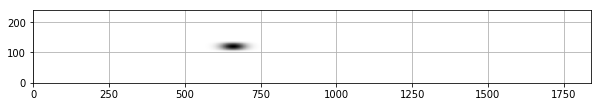

In [101]:
class WavePocket2D:
    def __init__(self, sigma_x, sigma_y, k):
        self.sigma_x = sigma_x
        self.sigma_y = sigma_y
        self.k = k

    def set_k(self, kk):
        self.k = kk

    def value(self, center, system_size):
        x_0, y_0 = center
        g2D_tab = np.zeros((system_size[1], system_size[0]), dtype="complex")
        X = np.arange(0, system_size[0]) #rosnący X ( system_size[1] == L )
        for y in range(system_size[1]): #system_size[1] = W
            g2D_tab[y] =  1/(2*np.pi*self.sigma_x*self.sigma_y) * np.exp(-( (X - x_0)**2/(2*self.sigma_x**2) + (y - y_0)**2/(2*self.sigma_y**2) ) + 1j*self.k*X) + 0.j

        return g2D_tab

    def value_2(self, center, system_size, canal_width, n):
        x_0, y_0 = center
        g2D_tab = np.zeros((system_size[0], system_size[1]), dtype="complex")
#         X = np.arange(0, system_size[0]) #rosnący X ( system_size[1] == L )
#         for y in range(system_size[1]): #system_size[1] = W
#             if y < y_0 - int(canal_width/2) or y > y_0 + int(canal_width/2):
#                 g2D_tab[y] = np.zeros((system_size[0]))
#             else:
#                 g2D_tab[y] =  1/(2*np.pi*self.sigma_x) * np.exp(-( (X - x_0)**2/(2*self.sigma_x**2) ) + 1j*self.k*X) * np.sqrt(2/canal_width)*np.sin(n*np.pi/canal_width*(y-y_0+int(canal_width/2))) + 0.j

        for i in range(system_size[0]):
            for j in range(system_size[1]):
                if j < y_0 - int(canal_width/2) or j > y_0 + int(canal_width/2):
                    g2D_tab[i,j] = 0
                else:
                    g2D_tab[i,j] =  1/(2*np.pi*self.sigma_x) * np.exp(-( (i - x_0)**2/(2*self.sigma_x**2) ) + 1j*self.k*i) * np.sqrt(2/canal_width)*np.sin(n*np.pi/canal_width*(j-y_0+int(canal_width/2))) + 0.j

        return g2D_tab

    
plt.rcParams["figure.figsize"] = (10,20)
L = 1840
W = 240
pocket = WavePocket2D(40,15,0.068).value_2((660,int(W/2)), (L,W), 40, 1)


plt.imshow((np.abs(pocket)**2).transpose(), extent=[0,L,0,W],origin="lower", cmap="gray_r")

# plt.ylim(100, 140)
# plt.xlim(400, 600)

plt.grid()
plt.show()


